In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sb

import warnings
from collections import Counter
import datetime

import wordcloud
import json

In [2]:
df = pd.read_csv('same_publishing_timing.csv')
df.head()

,title,publishedAt,categoryId,trending_date,view_count,likes,dislikes,comment_count,comments_disabled,Number_of_days_it_trended
0,How To Make a Curried Egg Sandwich,2020-08-07T18:30:06Z,26,2020-08-12T00:00:00Z,1238677,104736,3736,13876,False,1
1,Cake Rescue Fixing Viral Cake Fails | How To C...,2020-08-07T09:30:04Z,24,2020-08-12T00:00:00Z,938198,44088,565,2409,False,1
2,"Son, lemme teach you something new",2020-08-06T19:47:12Z,24,2020-08-12T00:00:00Z,1722152,169501,927,7263,False,1
3,Trump takes executive action to address econom...,2020-08-09T01:35:42Z,25,2020-08-12T00:00:00Z,1090847,10922,2517,9876,False,1
4,JUDAS AND THE BLACK MESSIAH - Official Trailer,2020-08-06T23:01:42Z,24,2020-08-12T00:00:00Z,971704,23311,1987,3240,False,1


In [3]:
PLOT_COLORS = ["#268bd2", "#0052CC", "#FF5722", "#b58900", "#003f5c"]
pd.options.display.float_format = '{:.2f}'.format
sb.set(style="ticks")
plt.rc('figure', figsize=(8, 5), dpi=100)
plt.rc('axes', labelpad=20, facecolor="#ffffff", linewidth=0.4, grid=True, labelsize=14)
plt.rc('patch', linewidth=0)
plt.rc('xtick.major', width=0.2)
plt.rc('ytick.major', width=0.2)
plt.rc('grid', color='#9E9E9E', linewidth=0.4)
plt.rc('font', family='Arial', weight='400', size=10)
plt.rc('text', color='#282828')
plt.rc('savefig', pad_inches=0.3, dpi=300)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21513 entries, 0 to 21512
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   title                      21513 non-null  object
 1   publishedAt                21513 non-null  object
 2   categoryId                 21513 non-null  int64 
 3   trending_date              21513 non-null  object
 4   view_count                 21513 non-null  int64 
 5   likes                      21513 non-null  int64 
 6   dislikes                   21513 non-null  int64 
 7   comment_count              21513 non-null  int64 
 8   comments_disabled          21513 non-null  bool  
 9   Number_of_days_it_trended  21513 non-null  int64 
dtypes: bool(1), int64(6), object(3)
memory usage: 1.5+ MB


In [5]:
view_count = pd.DataFrame(df['view_count'])
view_count.describe()

,view_count
count,21513.00
mean,2889314.96
std,7098768.34
min,43472.00
25%,597149.00
50%,1218600.00
75%,2667572.00
max,264407389.00


<AxesSubplot:>

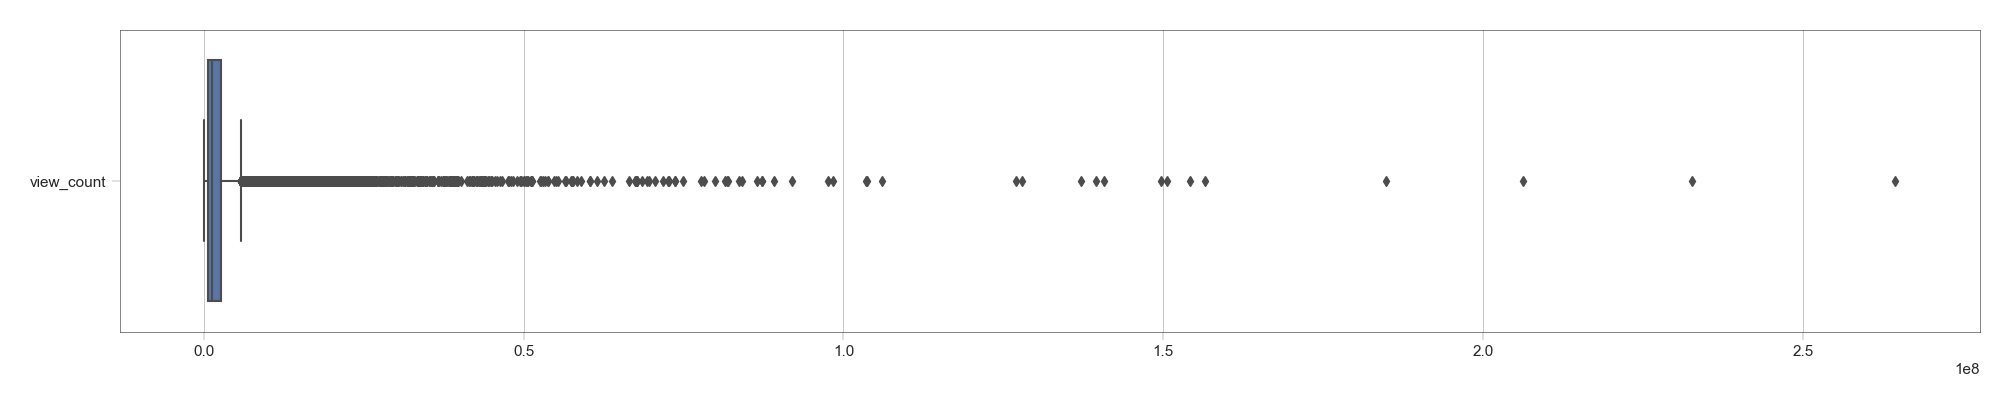

In [6]:
f = plt.figure(figsize = (24,4))
sb.boxplot(data = view_count, orient = "h")

<AxesSubplot:>

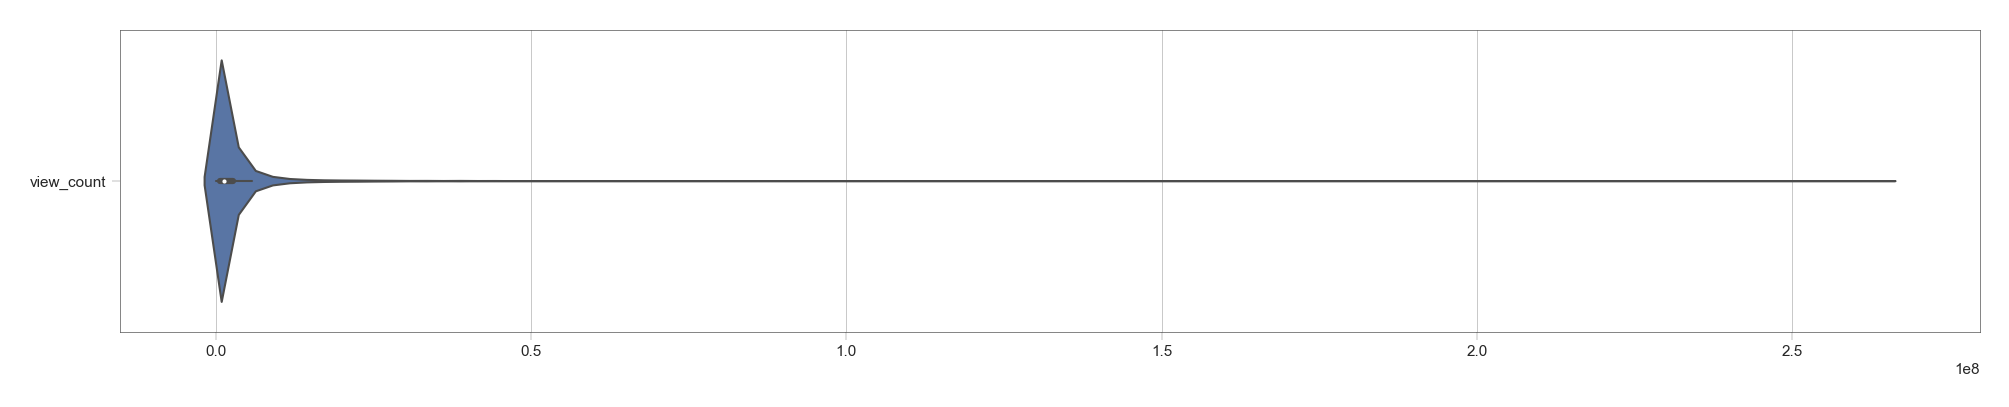

In [7]:
f = plt.figure(figsize = (24,4))
sb.violinplot(data = view_count, orient = "h")

In [8]:
no_of_trending = pd.DataFrame(df['Number_of_days_it_trended'])
no_of_trending.describe()

,Number_of_days_it_trended
count,21513.00
mean,5.52
std,1.99
min,1.00
25%,4.00
50%,5.00
75%,6.00
max,36.00


<AxesSubplot:>

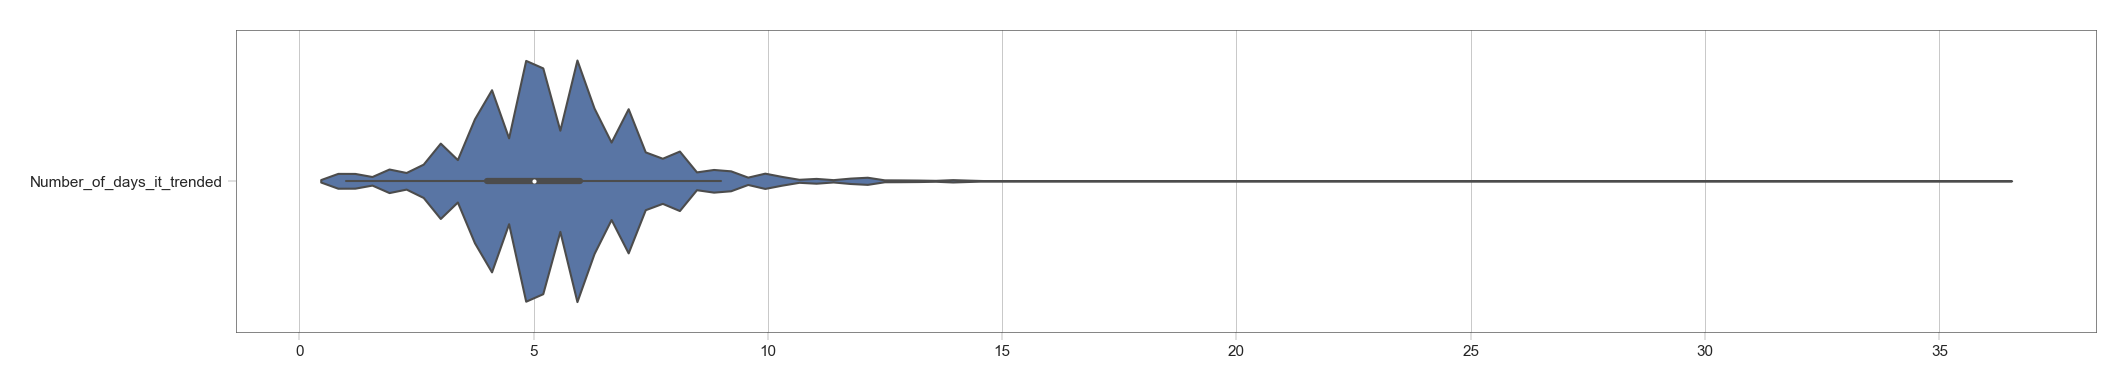

In [9]:
f = plt.figure(figsize = (24,4))
sb.violinplot(data = no_of_trending, orient = "h")

<AxesSubplot:>

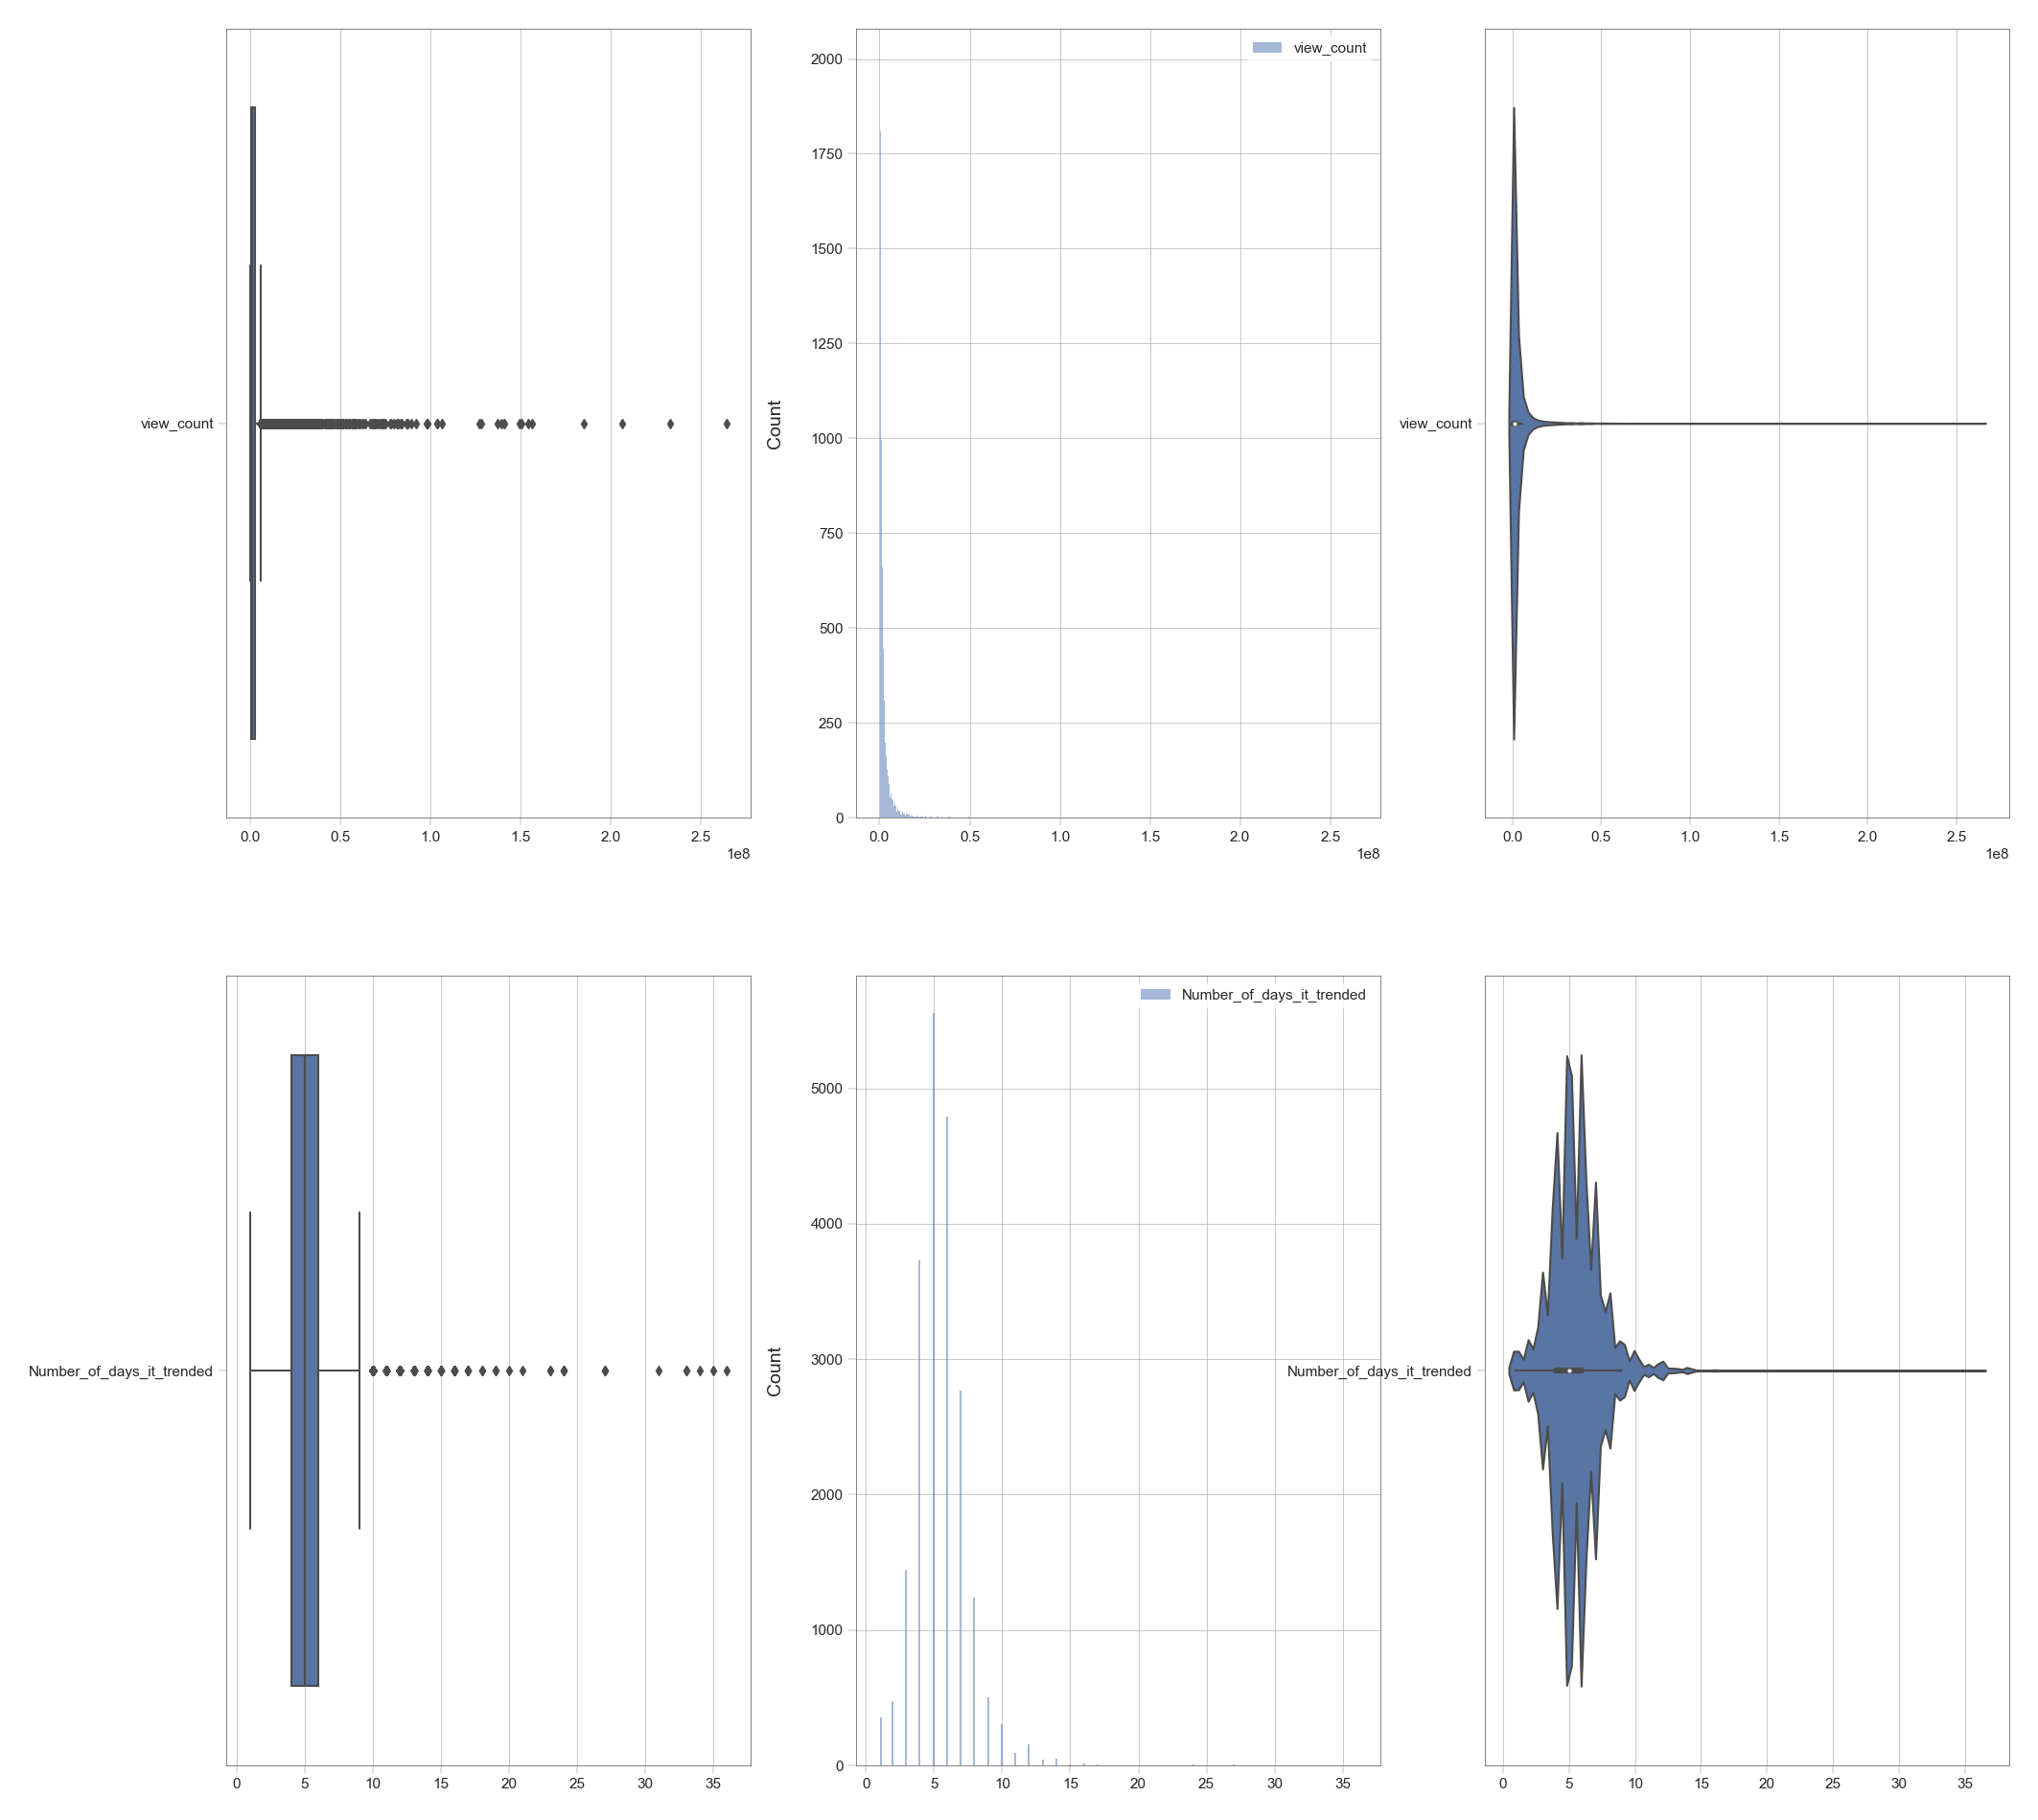

In [10]:
f, axes = plt.subplots(2, 3, figsize=(24, 24))

sb.boxplot(data = view_count, orient = "h", ax = axes[0,0])
sb.histplot(data = view_count, ax = axes[0,1])
sb.violinplot(data = view_count, orient = "h", ax = axes[0,2])

sb.boxplot(data = no_of_trending, orient = "h", ax = axes[1,0])
sb.histplot(data = no_of_trending, ax = axes[1,1])
sb.violinplot(data = no_of_trending, orient = "h", ax = axes[1,2])

# Data Analysis
 - numeric variables
 - catagory variables
 
How does it affects the view/ how trendy the video is
- Numeric Variables ( View count, likes, dislikes, comments)


In [11]:
numeric_data = df[["likes", "view_count", "dislikes", "comment_count", "categoryId", "Number_of_days_it_trended"]]


<AxesSubplot:>

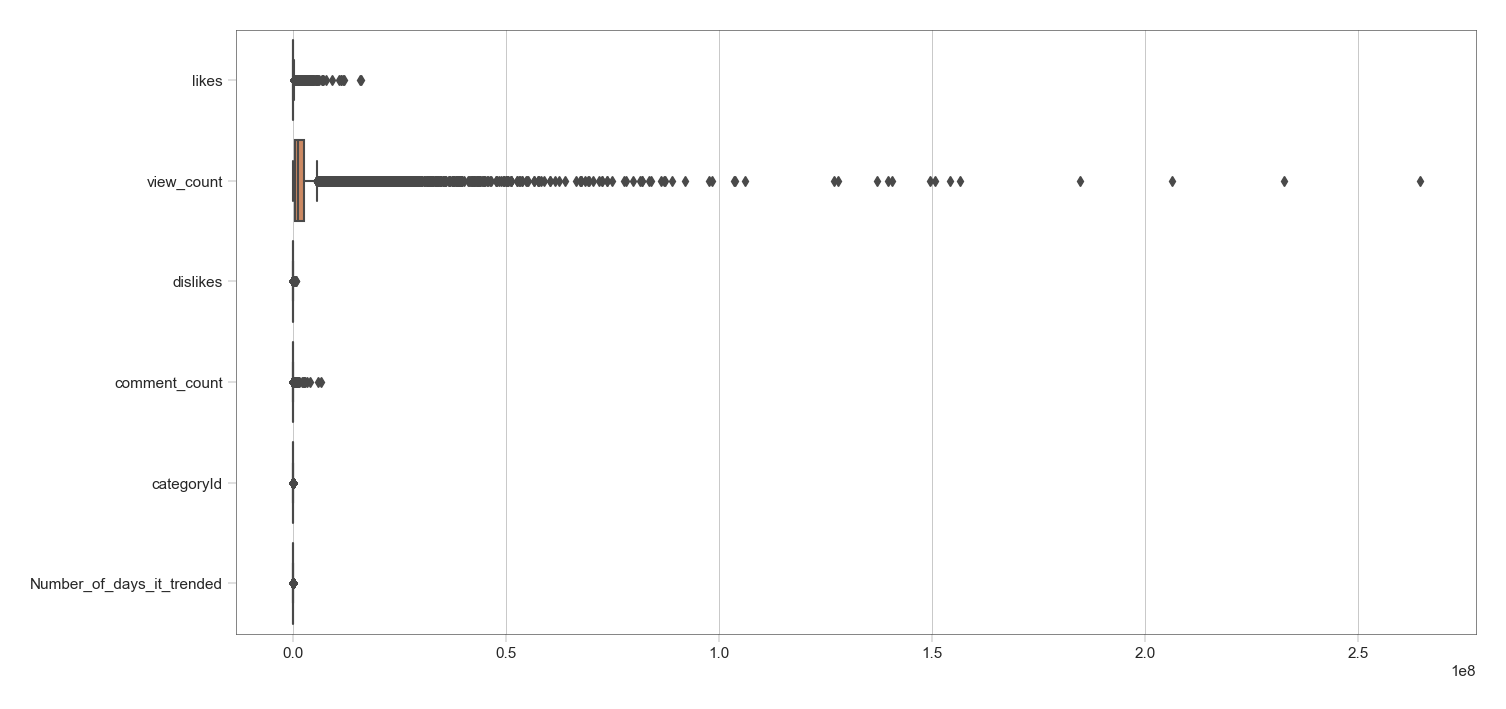

In [12]:
# Draw the Boxplots of all variables
f = plt.figure(figsize=(16, 8))
sb.boxplot(data = numeric_data, orient = "h")

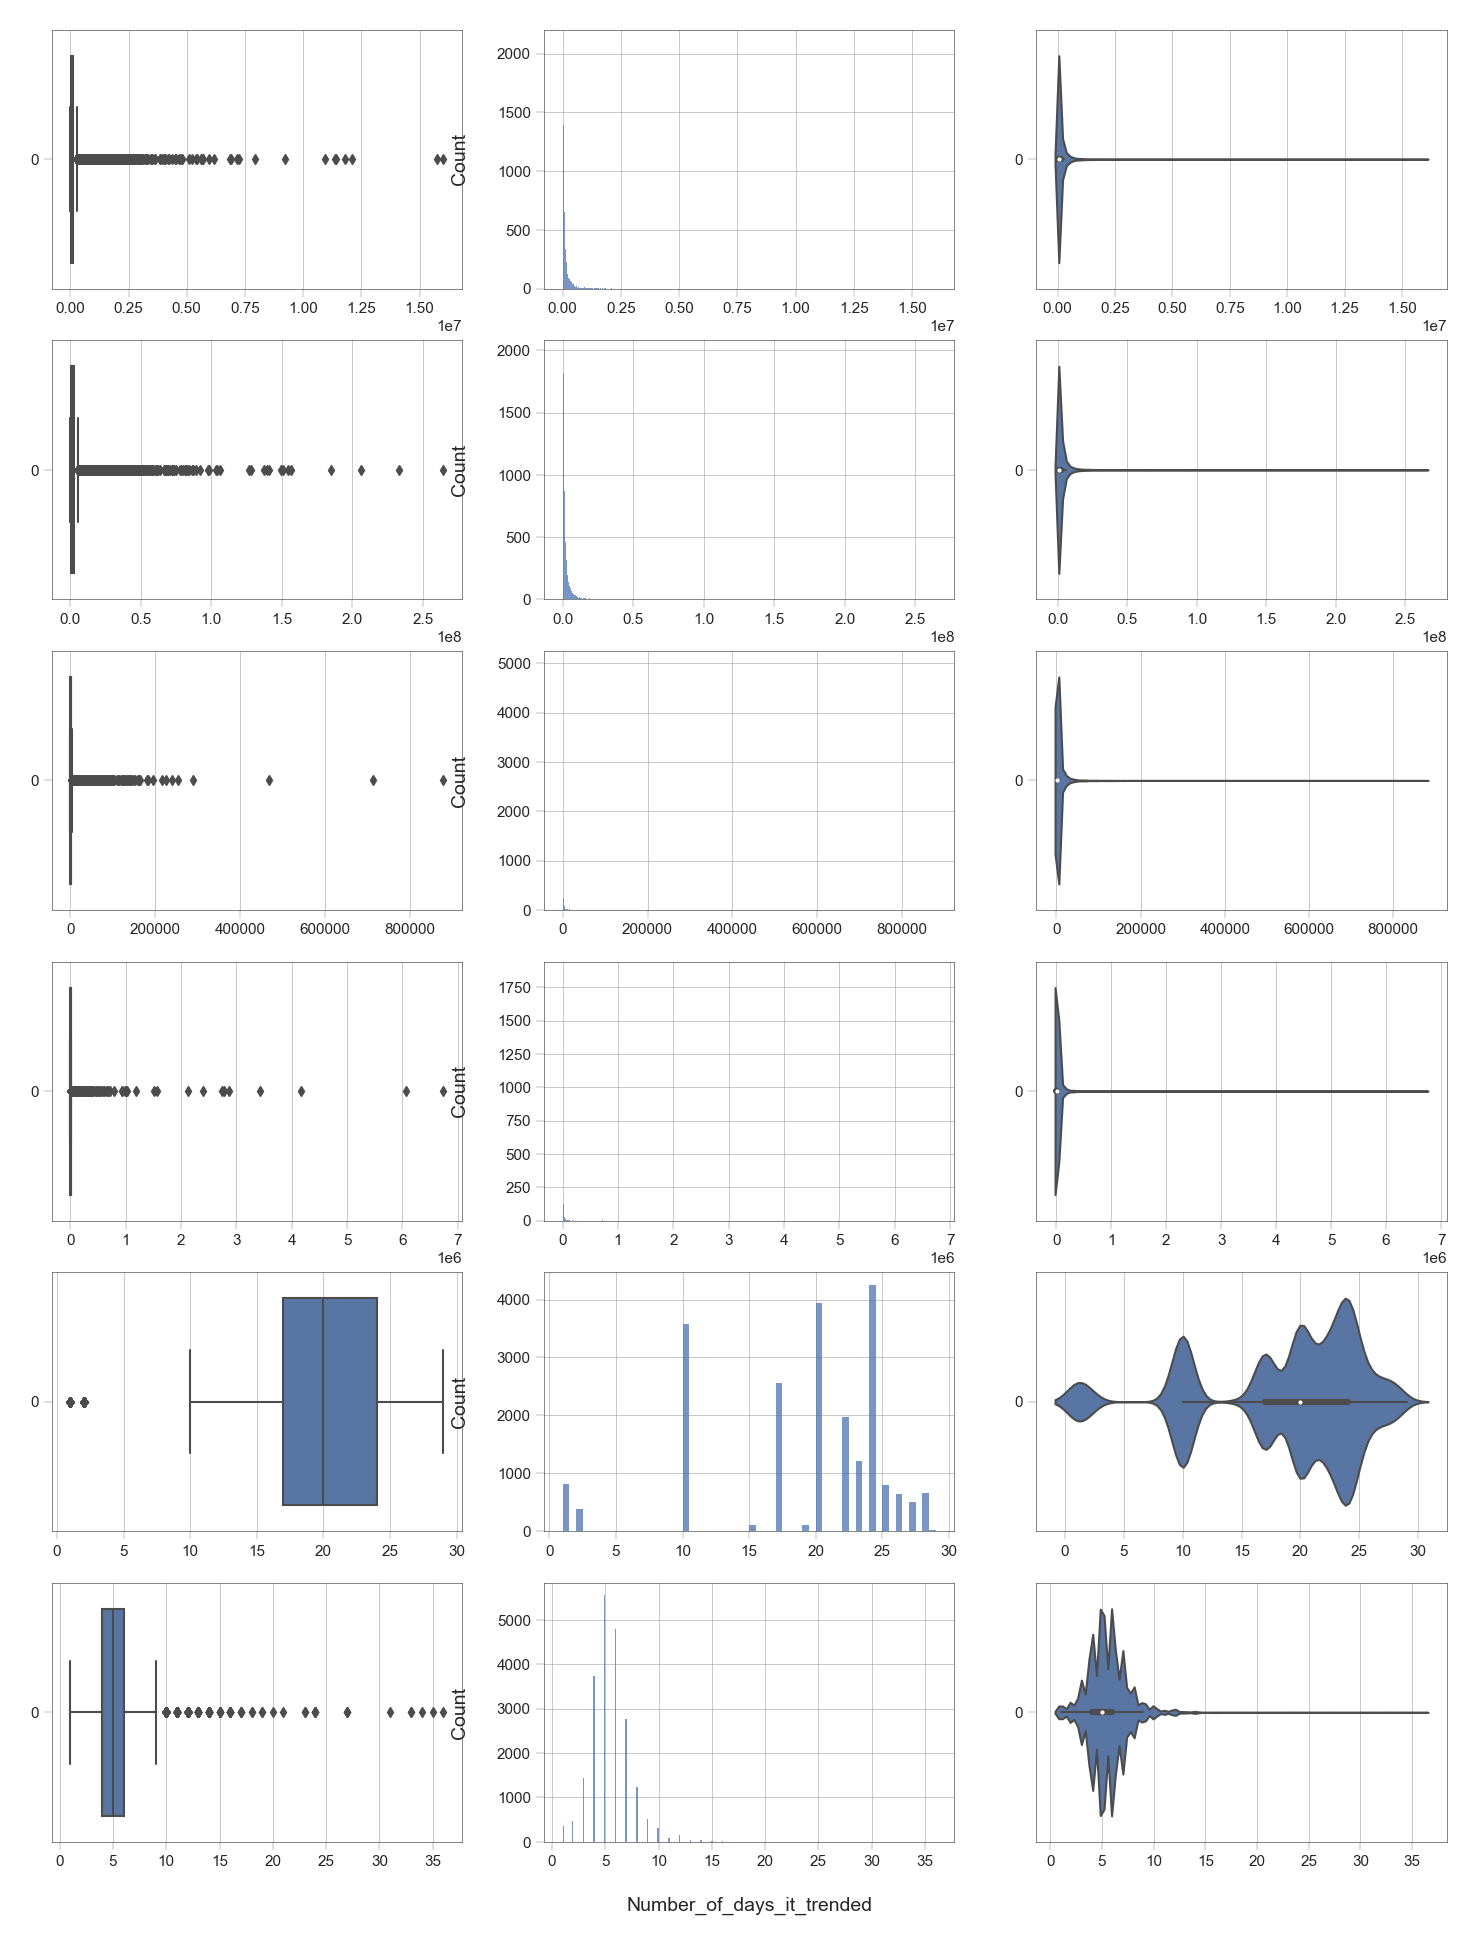

In [13]:
# Draw the distributions of all variables
f, axes = plt.subplots(6, 3, figsize=(18, 24))

count = 0
for var in numeric_data:
    sb.boxplot(data = numeric_data[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = numeric_data[var], ax = axes[count,1])
    sb.violinplot(data = numeric_data[var], orient = "h", ax = axes[count,2])
    count += 1

                           likes  view_count  dislikes  comment_count  \
likes                       1.00        0.86      0.61           0.70   
view_count                  0.86        1.00      0.65           0.59   
dislikes                    0.61        0.65      1.00           0.52   
comment_count               0.70        0.59      0.52           1.00   
categoryId                 -0.08       -0.07     -0.04          -0.06   
Number_of_days_it_trended   0.18        0.24      0.14           0.07   

                           categoryId  Number_of_days_it_trended  
likes                           -0.08                       0.18  
view_count                      -0.07                       0.24  
dislikes                        -0.04                       0.14  
comment_count                   -0.06                       0.07  
categoryId                       1.00                      -0.02  
Number_of_days_it_trended       -0.02                       1.00  


<AxesSubplot:>

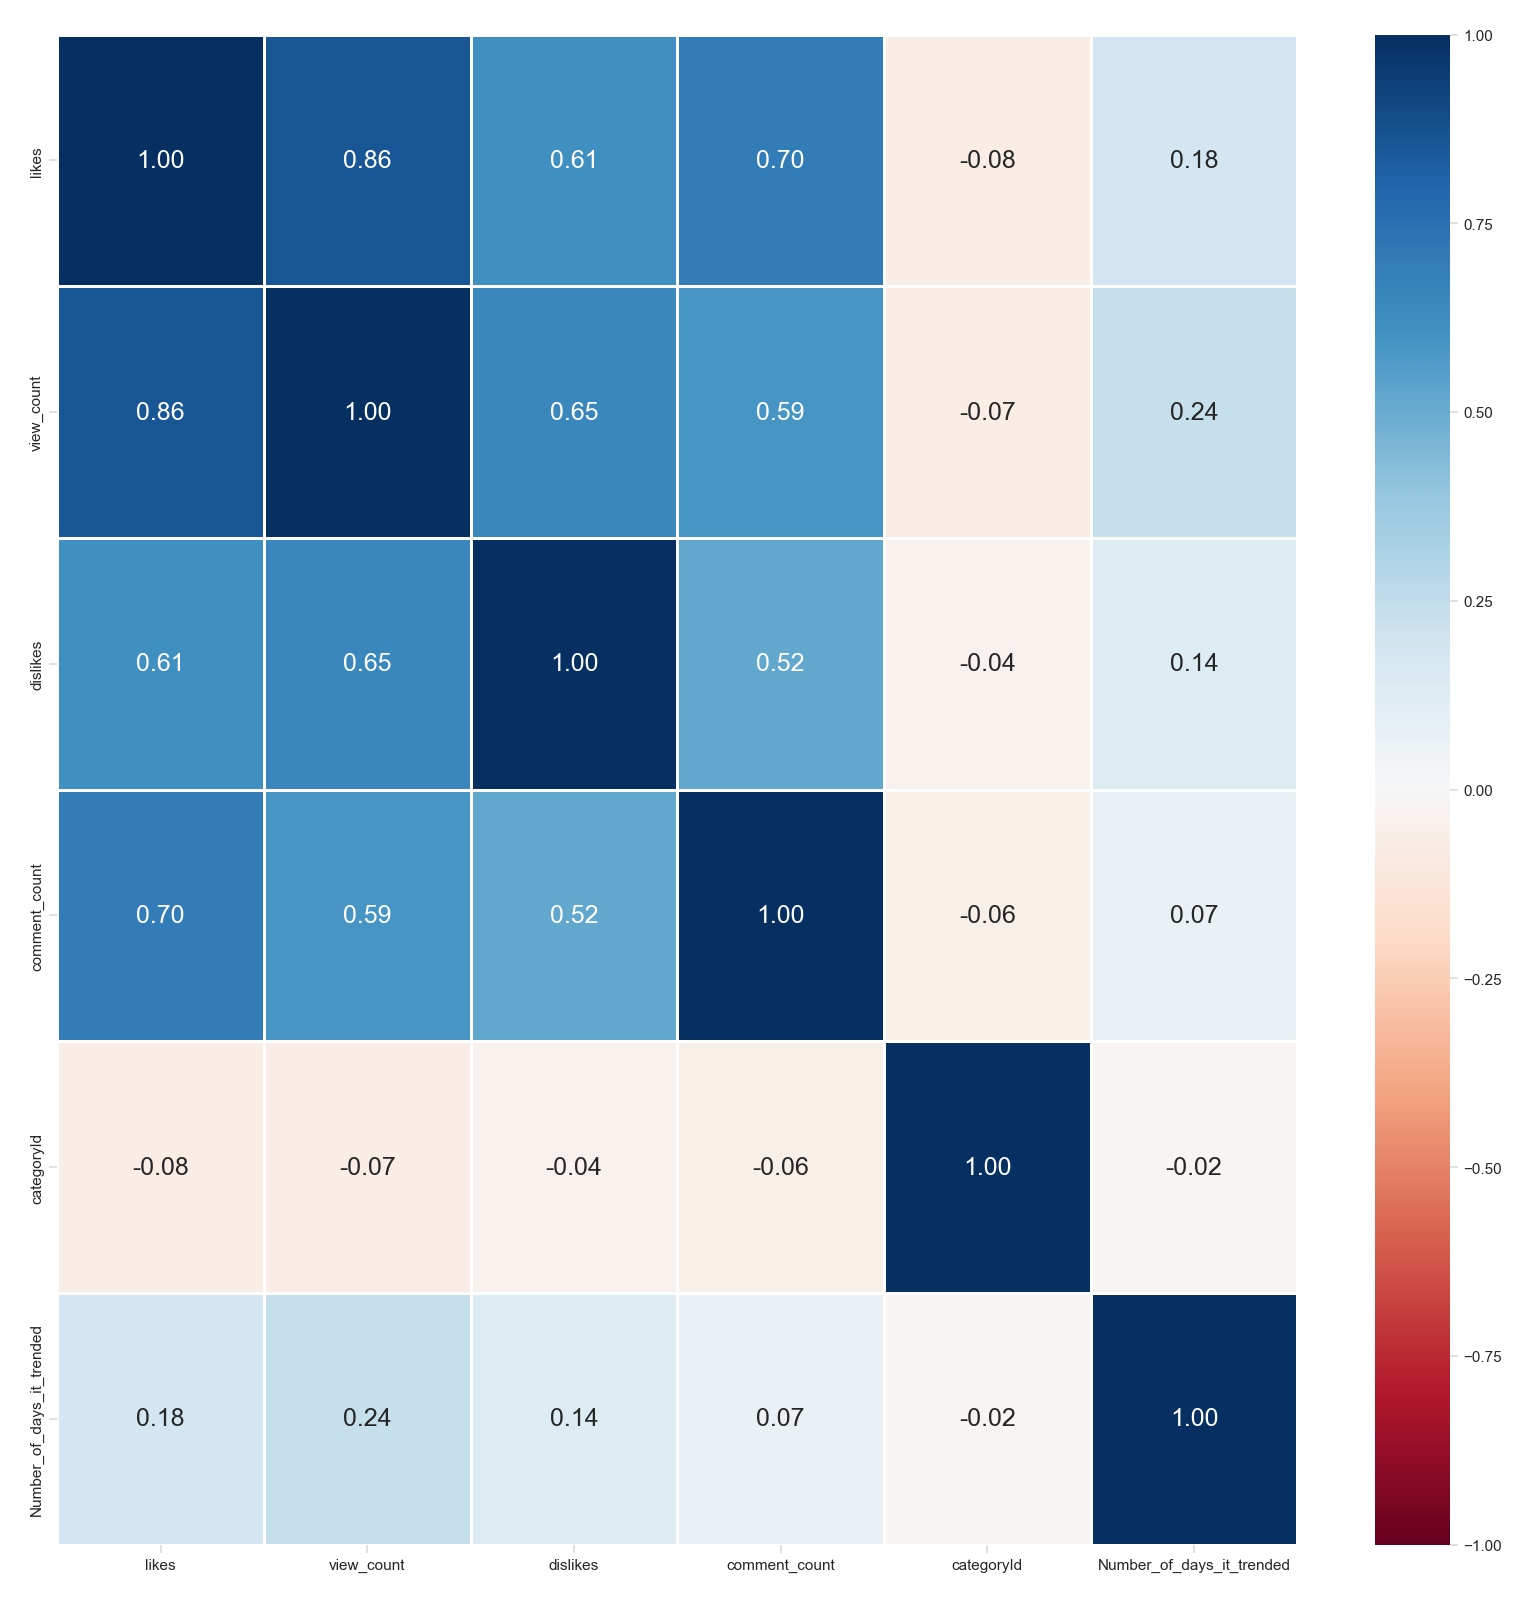

In [14]:
# Correlation Matrix
print(numeric_data.corr())

# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(20, 20))
sb.heatmap(numeric_data.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

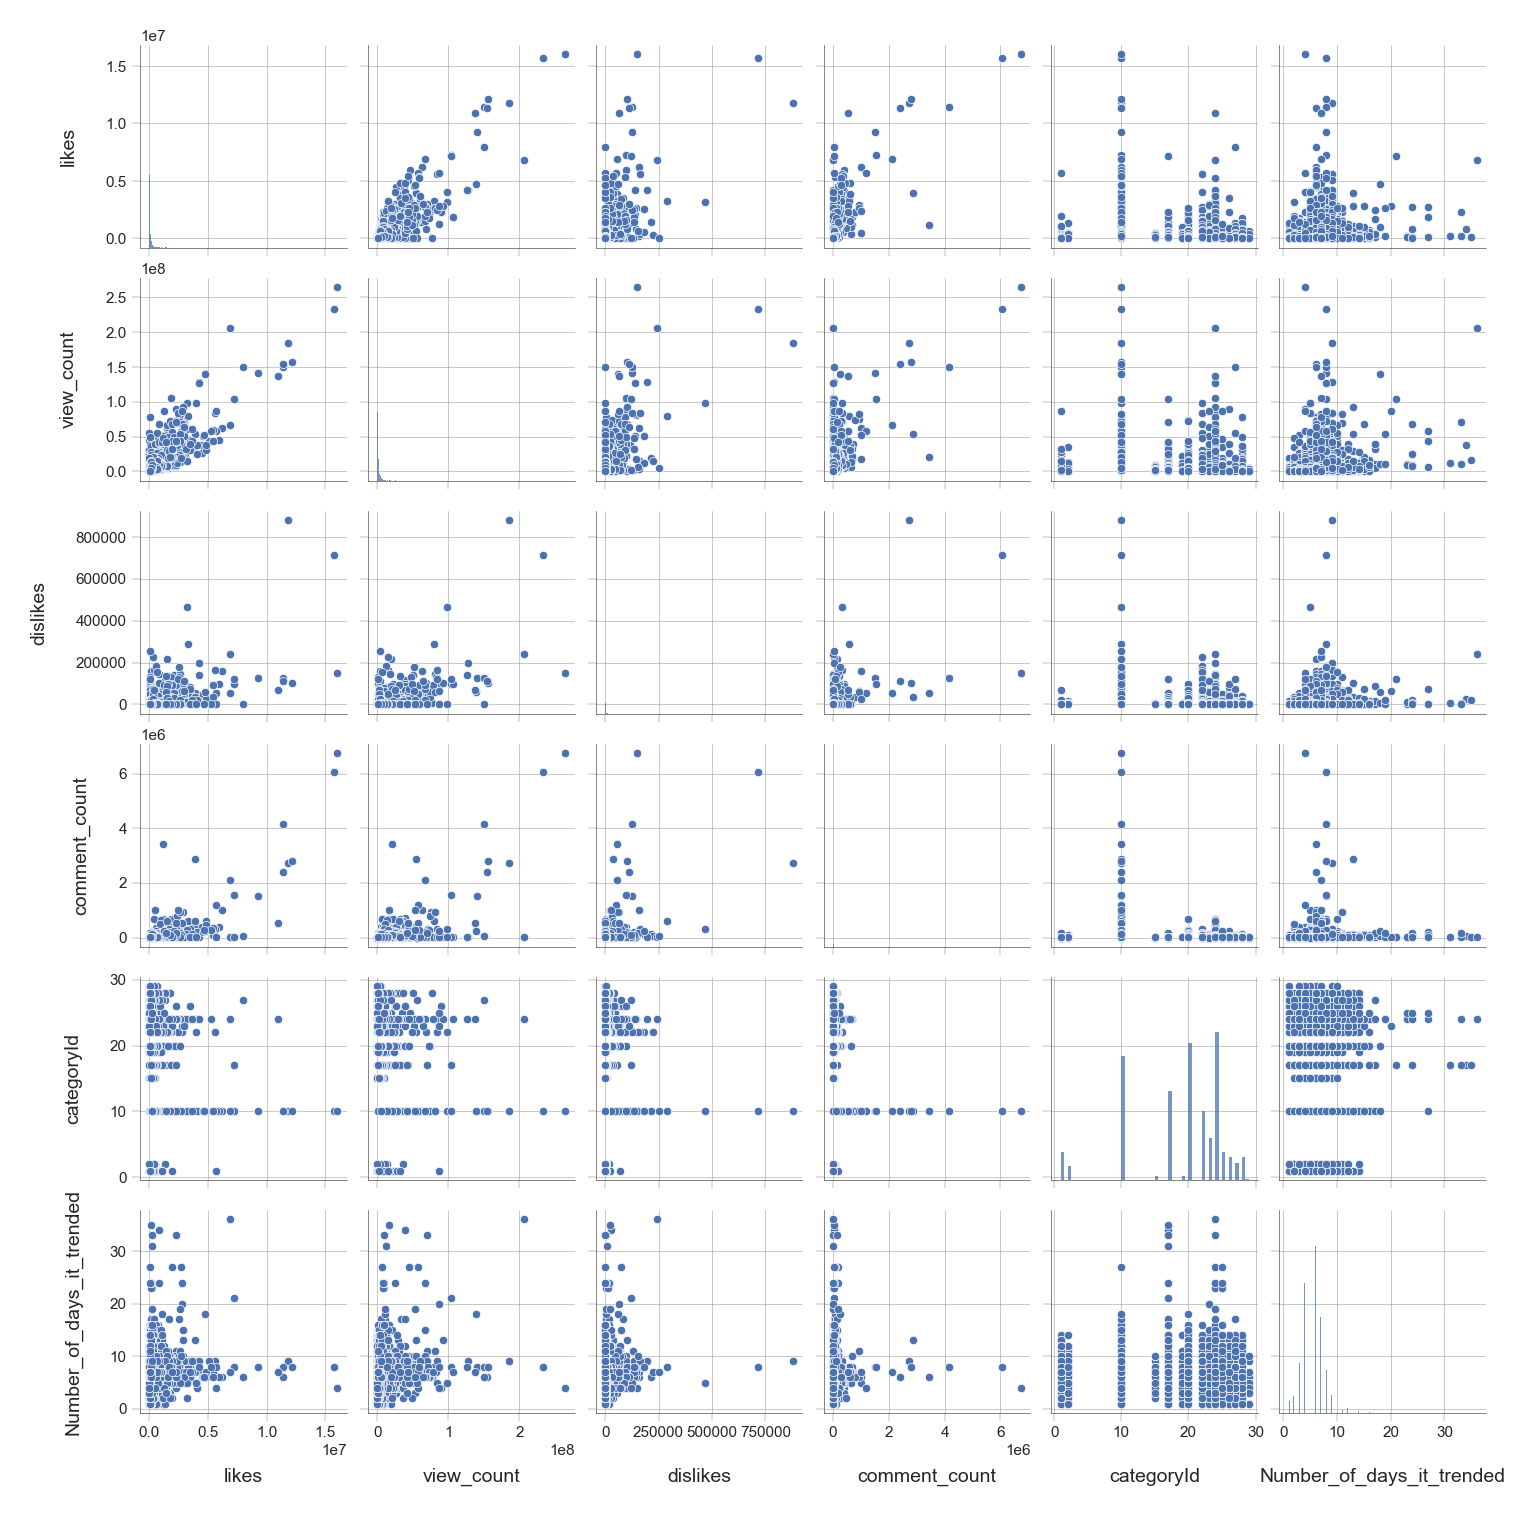

In [15]:
# Draw pairs of variables against one another
sb.pairplot(data = numeric_data)

# Numeric 

From the dataset above, we observe that the mean and median of the datasets differs by a large extent.

The mean view of a trending video in 2021 is about 2 816 360 views.
The median view is much lower at 1 125 213, less than half of the average views.

The mean likes of a trending video is 151 165.
The median likes is also much lower than the mean at 52328.

The mean comments of a trending video is 11 614.
The median comments is 3 531 which too is much lower than the mean.

C:\Users\jefft\juypter\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


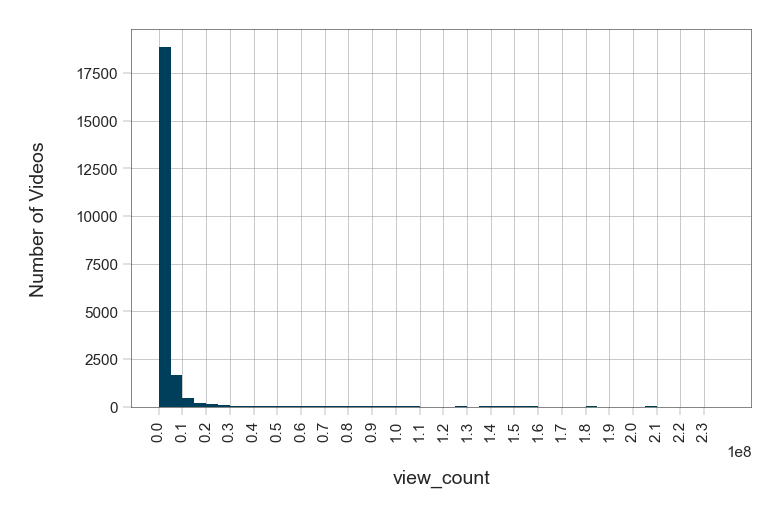

In [16]:
fig, ax = plt.subplots()
_ = sb.distplot(df["view_count"], kde=False, color=PLOT_COLORS[4], 
                 hist_kws={'alpha': 1}, bins=np.linspace(0, 2.3e8, 47), ax=ax)
_ = ax.set(xlabel="view_count", ylabel="Number of Videos", xticks=np.arange(0, 2.4e8, 1e7))
_ = ax.set_xlim(right=2.5e8)
_ = plt.xticks(rotation=90)

In [17]:
df[df['view_count'] < 1e6]['view_count'].count() / df['view_count'].count() * 100

42.941477246316175

Using the formula above, we can observe that about 45% of videos have less than a million view.

In [18]:
df[df['view_count'] < 1.5e6]['view_count'].count() / df['view_count'].count() * 100

57.23980848789104

With the same formula, we observed that about 60% which is over half of the trending videos have views less than 1 500 000 views.

In [19]:
df[df['view_count'] < 2.85e6]['view_count'].count() / df['view_count'].count() * 100 - df[df['view_count'] < 2.75e6]['view_count'].count() / df['view_count'].count() * 100

1.0179891228559512

With the mean at about 2 800 000 views, we see that only about 0.8% of the videos fall within +/- 500 000 range of the mean. Thus a median is actually a better tool than median.

### Here we will be looking deeper into the likes of trending videos

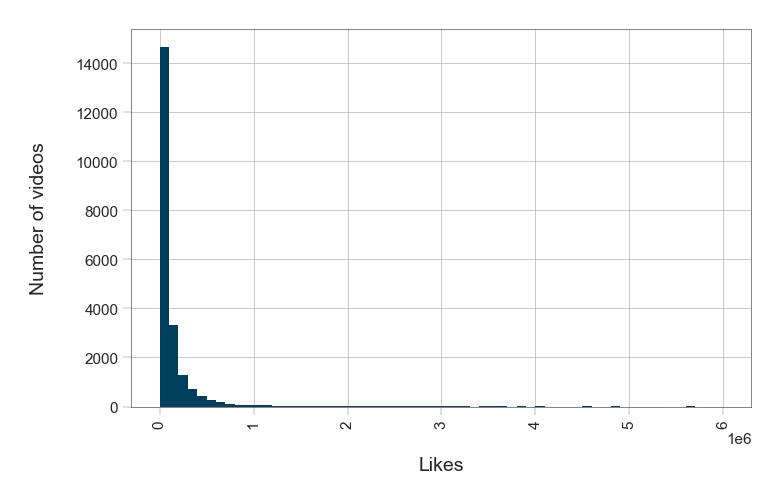

In [20]:
plt.rc('figure.subplot', wspace=0.9)
fig, ax = plt.subplots()
_ = sb.distplot(df["likes"], kde=False, 
                 color=PLOT_COLORS[4], hist_kws={'alpha': 1}, 
                 bins=np.linspace(0, 6e6, 61), ax=ax)
_ = ax.set(xlabel="Likes", ylabel="Number of videos")
_ = plt.xticks(rotation=90)

From the distribution of this graph, we can observe that the data is slightly more evenly distributed than that of views. We will dive deeper and see how the distribution is like.

In [21]:
df[df['likes'] < 151165]['likes'].count() / df['likes'].count() * 100

78.02723934365268

In [22]:
df[df['likes'] < 52328]['likes'].count() / df['likes'].count() * 100

50.123181332217726

(0.0, 1000000.0)

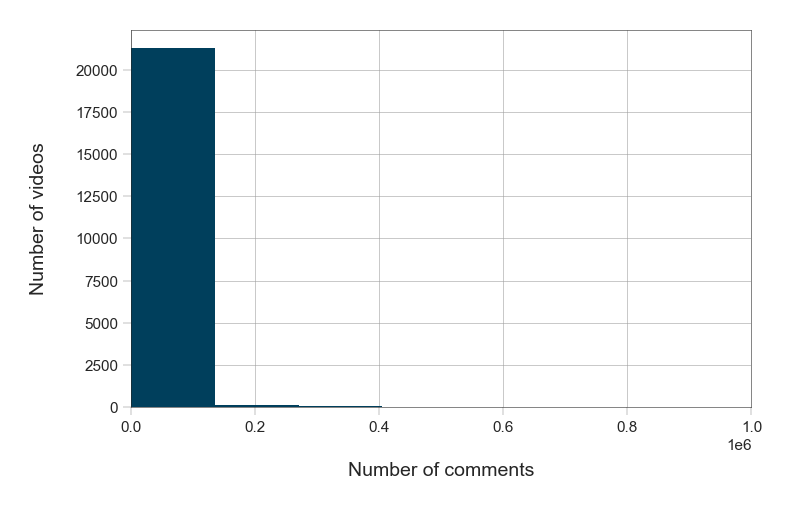

In [23]:
fig, ax = plt.subplots()
_ = sb.distplot(df["comment_count"], kde=False, rug=False, 
                 color=PLOT_COLORS[4], hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="Number of comments", ylabel="Number of videos")
plt.xlim(0, 1000000)

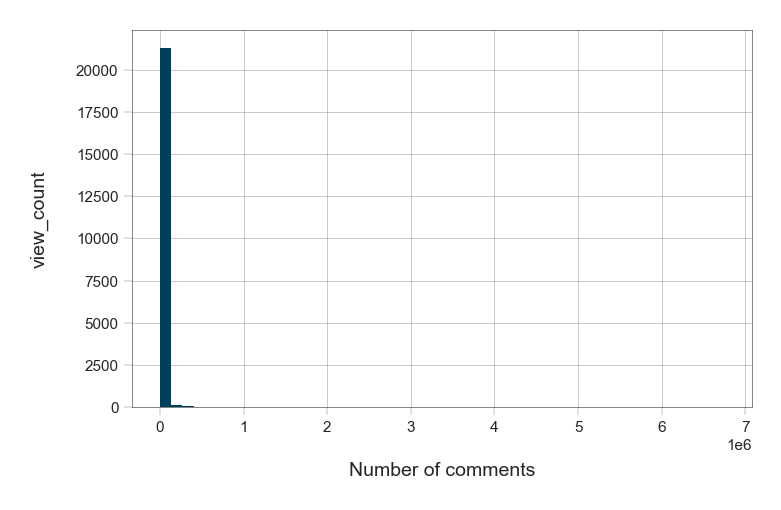

In [24]:
fig, ax = plt.subplots()
_ = sb.distplot(df["comment_count"], kde=False, rug=False, 
                 color=PLOT_COLORS[4], hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="Number of comments", ylabel="view_count")

The distribution here is very small and thus it is very difficult for us to observe anything, but we observe that most of the data is below 3 so we will take a deeper look by only observing the entries that are below 300 000.

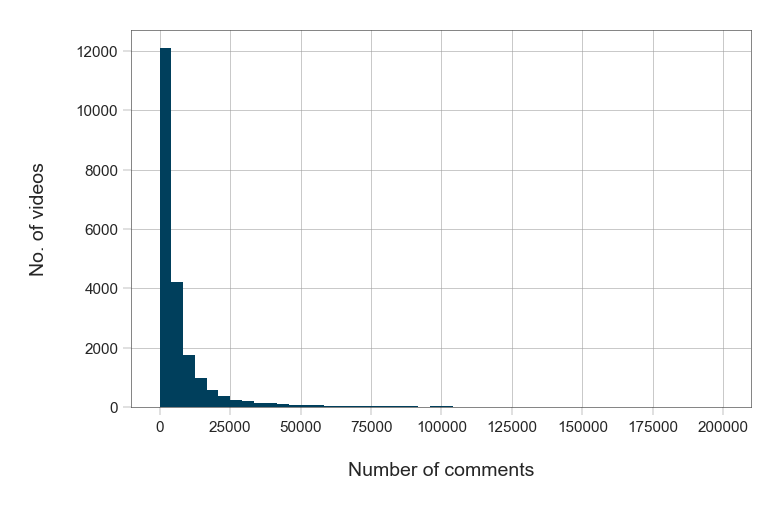

In [25]:
fig, ax = plt.subplots()
_ = sb.distplot(df[df["comment_count"] < 200000]["comment_count"], kde=False, rug=False, 
                 color=PLOT_COLORS[4], hist_kws={'alpha': 1}, 
                 bins=np.linspace(0, 2e5, 49), ax=ax)
_ = ax.set(xlabel="Number of comments", ylabel="No. of videos")

With this new enlarged view, we can now see a better distribution. There is a better trend to observe too where the number of comments are inversely proportionate to the number of videos.

The mean comments of a trending video is 11 614. The median comments is 3 531 which too is much lower than the mean.

In [26]:
df[df['comment_count'] < 11614]['comment_count'].count() / df['comment_count'].count() * 100

82.83828382838284

In [27]:
df[df['comment_count'] < 3531]['comment_count'].count() / df['comment_count'].count() * 100

50.922697903593175

We can see about 80% of the trending videos fall below the mean whereas for the medium, about 50% falls below and the other 50% falls above.

Comparing the dstribution of the number of comments and likes using median and mean, both have similar statistics. However, there are more common span and bots that contribute to the comments than the likes which we are unable to filter out. This will lead to higher inaccuracy in the dataset over the likes dataset. Therefore we will use the number of likes to attempt to model a linear regression against Number of trending videos.

# Does category affect the number of trending days?

<AxesSubplot:xlabel='categoryId', ylabel='Number_of_days_it_trended'>

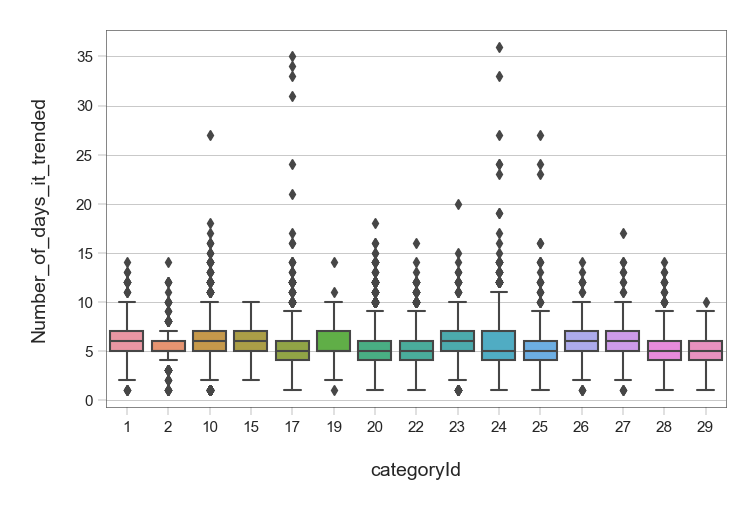

In [28]:
sb.boxplot( x = df['categoryId'], y= df['Number_of_days_it_trended'])

### Now we need to find the total number of videos per category 
### By rotating the x axis labels, it is easier to see each category 

In [29]:
with open("US_category_id.json") as f:
    categories = json.load(f)["items"]
cat_dict = {}
for cat in categories:
    cat_dict[int(cat["id"])] = cat["snippet"]["title"]
df['category_name'] = df['categoryId'].map(cat_dict)

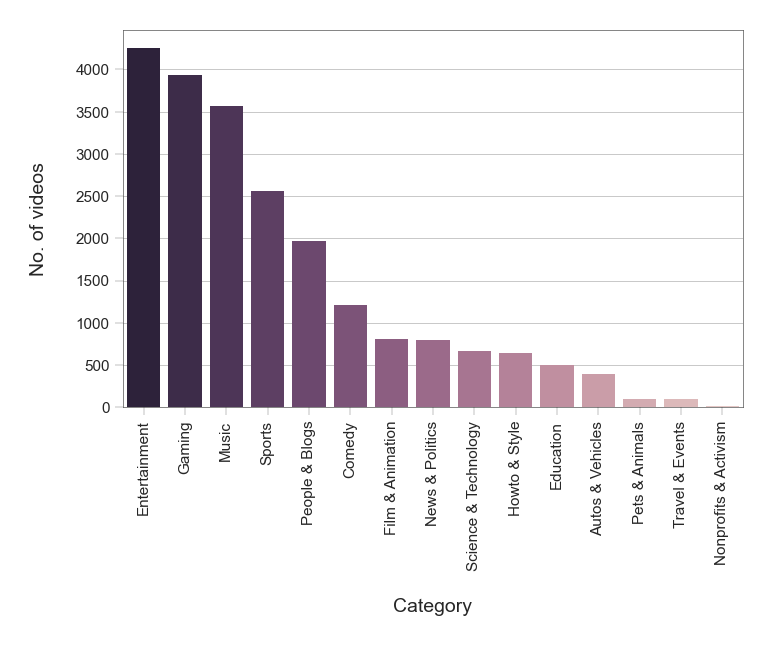

In [30]:
cdf = df["category_name"].value_counts().to_frame().reset_index()
cdf.rename(columns={"index": "category_name", "category_name": "No_of_videos"}, inplace=True)
fig, ax = plt.subplots()
_ = sb.barplot(x="category_name", y="No_of_videos", data=cdf, 
        palette=sb.cubehelix_palette(n_colors=16, reverse=True), ax=ax)
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
_ = ax.set(xlabel="Category", ylabel="No. of videos")

### As can be seen from the bar plot, it can be seen that both gaming and entertainment are the two top categories on Youtube that are trending in 2021.

In [31]:
df["publishing_day"] = df["publishedAt"].apply(
    lambda x: datetime.datetime.strptime(x[:10], "%Y-%m-%d").date().strftime('%a'))
df["publishing_hour"] = df["publishedAt"].apply(lambda x: x[11:13])
df.drop(labels='publishedAt', axis=1, inplace=True)

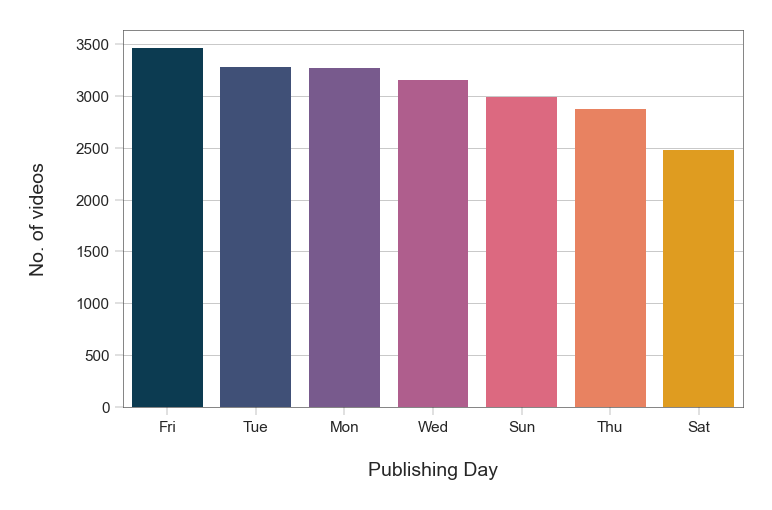

In [32]:
cdf = df["publishing_day"].value_counts()\
        .to_frame().reset_index().rename(columns={"index": "publishing_day", "publishing_day": "No_of_videos"})
fig, ax = plt.subplots()
_ = sb.barplot(x="publishing_day", y="No_of_videos", data=cdf, 
                palette=sb.color_palette(['#003f5c', '#374c80', '#7a5195', 
                                           '#bc5090', '#ef5675', '#ff764a', '#ffa600'], n_colors=7), ax=ax)
_ = ax.set(xlabel="Publishing Day", ylabel="No. of videos")

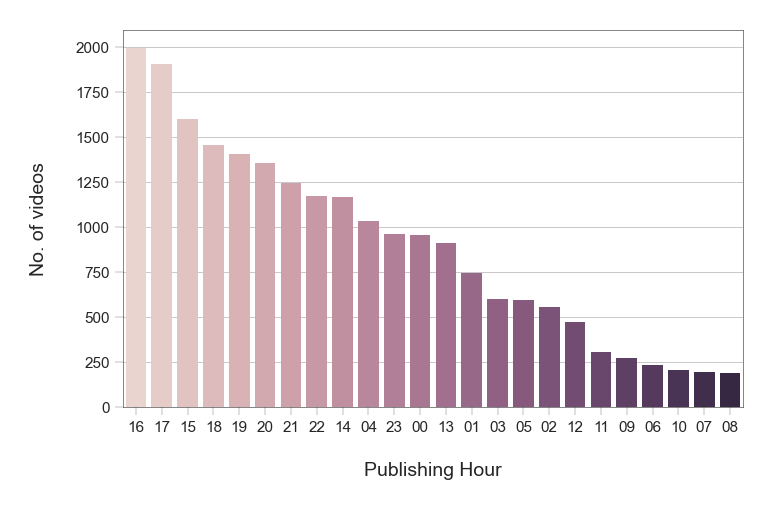

In [33]:
cdf = df["publishing_hour"].value_counts().to_frame().reset_index()\
        .rename(columns={"index": "publishing_hour", "publishing_hour": "No_of_videos"})
fig, ax = plt.subplots()
_ = sb.barplot(x="publishing_hour", y="No_of_videos", data=cdf, 
                palette=sb.cubehelix_palette(n_colors=25), ax=ax)
_ = ax.set(xlabel="Publishing Hour", ylabel="No. of videos")

# Data analysis for what type of videos it more likely to be trendy base on title

In [34]:
title_words = list(df["title"].apply(lambda x: x.split()))
title_words = [x for y in title_words for x in y]
Counter(title_words).most_common(25)

[('|', 5630),
 ('-', 5326),
 ('The', 2607),
 ('the', 1841),
 ('I', 1627),
 ('in', 1521),
 ('(Official', 1438),
 ('&', 1414),
 ('to', 1388),
 ('Video)', 1291),
 ('a', 1186),
 ('of', 1137),
 ('A', 866),
 ('and', 854),
 ('Music', 753),
 ('on', 750),
 ('Trailer', 736),
 ('2021', 645),
 ('To', 619),
 ('#shorts', 619),
 ('My', 603),
 ('Highlights', 579),
 ('at', 576),
 ('Minecraft', 575),
 ('with', 568)]

In [35]:
### Majority of people watch?

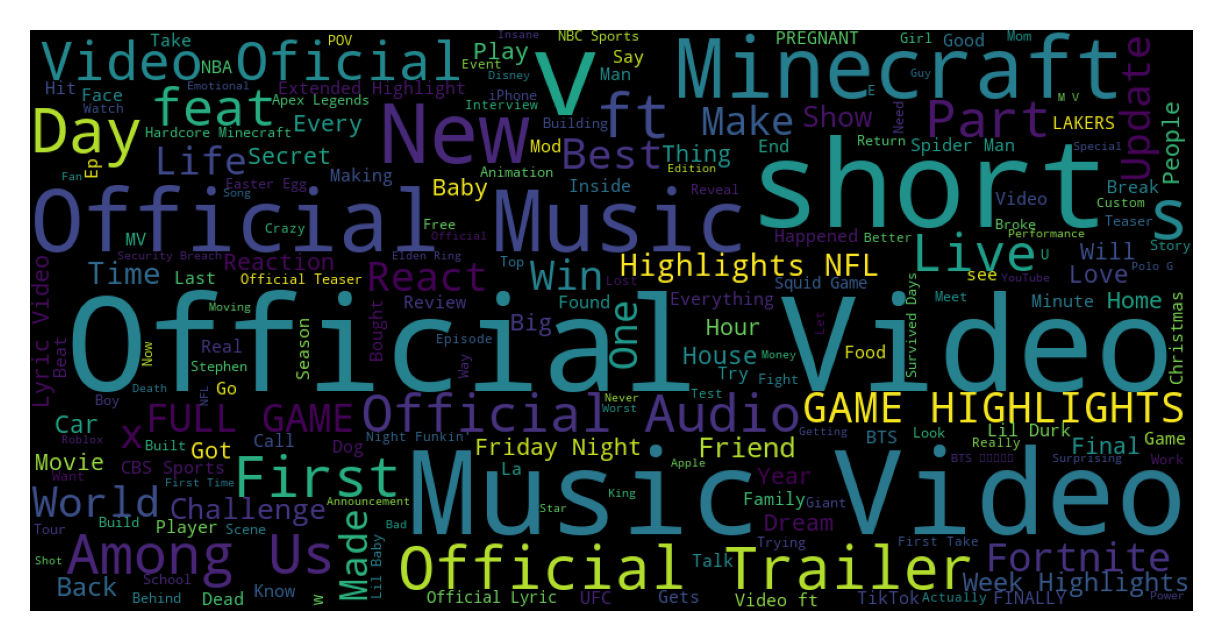

In [36]:
titles_1 = df.loc[df['view_count'] > 100000].sort_values('view_count', ascending=False)['title'][1:].tolist()
words_1 = [word for titles_1 in titles_1 for word in titles_1.split()]


from wordcloud import WordCloud
words_1_joined=(" ").join(words_1)
wordcloud = WordCloud(width = 1000, height = 500).generate(words_1_joined)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
plt.close()

# What people don’t watch 

View count vs tags

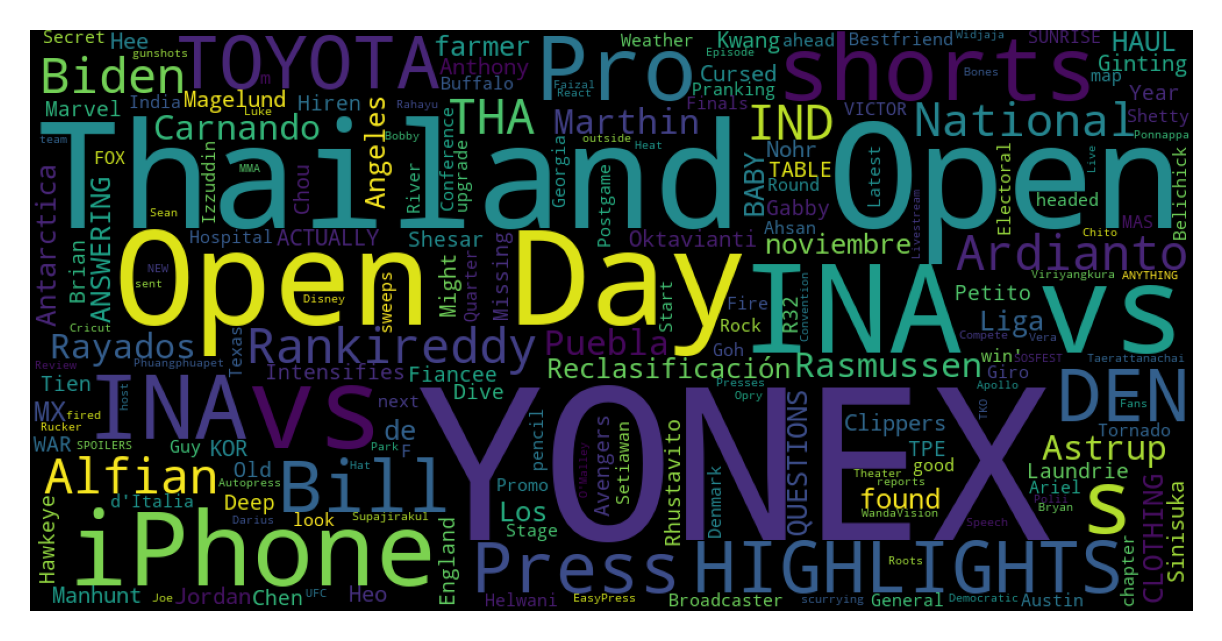

In [37]:
titles_1 = df.loc[df['view_count'] < 100000 ].sort_values('view_count', ascending=False)['title'][1:].tolist()
words_1 = [word for titles_1 in titles_1 for word in titles_1.split()]


from wordcloud import WordCloud
words_1_joined=(" ").join(words_1)
wordcloud = WordCloud(width = 1000, height = 500).generate(words_1_joined)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
plt.close()

## What insights from data analysis

From the histogram we plotted for number of trending videos against categories. We see distinct differences between different categories, by partitioning them to different categories as the first layer of a classification tree. We can then use different categorical variables for different video categories at subsequent classification tree layers which may be more effective in differentiating trending vs non trending videos for our dataset.

Even though the title of the videos may be impactful to the trend of the video, however we decide to use video category as our non numeric data to use for machine learning instead of the words in the video title since categorical variable is a much more structured data than words from title of a video which is extremely unstructured and difficult to work with. Humonyms words such as "Mouse" may appear in Gaming channels and also Pets & Animals channel making machine learning with such words like this difficult.

Channels ID representing channels with high subscribers count may have their videos trended more, we decide to not consider the channel IDs since by using this as a dataset for our machine learning, we might unintentionally bias our video trend days to certain channel IDs who has larger subscriber base and thus videos predicted to trend longer and likewise channels that may have made trending videos but not being predicted to trend lower due to its subscriber count.